In [2]:
import numpy as np
import pandas as pd
import statistics as stats
import math
import matplotlib.pyplot as plt

In [3]:
aapl_hist = pd.read_csv('AAPL.csv')
aapl_hist

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-18,24.674999,25.032499,24.650000,24.957500,23.314920,145975600
1,2016-07-19,24.889999,25.000000,24.834999,24.967501,23.324263,95119600
2,2016-07-20,25.000000,25.115000,24.934999,24.990000,23.345284,105104000
3,2016-07-21,24.957500,25.250000,24.782499,24.857500,23.221504,130808000
4,2016-07-22,24.815001,24.825001,24.577499,24.665001,23.041672,113254800
...,...,...,...,...,...,...,...
1254,2021-07-12,146.210007,146.320007,144.000000,144.500000,144.500000,76299700
1255,2021-07-13,144.029999,147.460007,143.630005,145.639999,145.639999,100827100
1256,2021-07-14,148.100006,149.570007,147.679993,149.149994,149.149994,127050800
1257,2021-07-15,149.240005,150.000000,147.089996,148.479996,148.479996,106820300


## Sharpe Ratio

Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio. The Sharpe ratio can help you determine the investment choice that will deliver the highest returns while considering risk.

In [12]:
'''Function calculates Sharpe Ratio of an investing strategy. Function takes holding history, risk-free rate 
and investment duration as agruments. By default, invest duration is set to 0, which means that investment 
duration is should be the same as the holding period'''

def sharpe_ratio(hold_hist, riskfree_rate, invest_dura = 0):
    # if invest_dura == 0, find invest duration based on holding history
    if invest_dura == 0:
        invest_dura = len(hold_hist)
        
    excess_return = [0]
    for i in range(len(hold_hist) - 1):
        today_price = float(hold_hist.at[i+1, 'Close'])
        yesterday_price = float(aapl_hist.at[i, 'Close'])
        ret = (today_price - yesterday_price)/yesterday_price
    
        # append to excess return list
        excess_return.append(ret - riskfree_rate/invest_dura) 
    
    mean = stats.mean(excess_return)
    std = stats.stdev(excess_return)
    
    sharpe = mean/std*math.sqrt(invest_dura)
    print('Sharpe Ratio:',sharpe)
    return sharpe

In [51]:
sharpe_ratio(aapl_hist, 0)

Sharpe Ratio: 2.954467336345958


2.954467336345958

## Maximum Drawdown

A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.

In [13]:
'''Function calculates Maximum Drawdown and Maximum Drawdown Duration of an investing strategy. Function takes
holding history as its only input agrument and returns MDD and MDD duration'''

def mdd(hold_hist):
    mdd = 0
    curr_mdd = 0
    mdd_duration = 0
    curr_mdd_duration = 0

    curr_trough = hold_hist.at[0,'Close'] 
    curr_peak = hold_hist.at[0,'Close']    
    curr_peak_date = ''
    curr_trough_date = ''
    final_peak_date = ''
    final_trough_date = ''
    
    final_peak_value = 0
    final_trough_value = 0
    
    for i in range(len(hold_hist)):
        # set new peak if current price higher than current peak and calculate current mdd
        if hold_hist.at[i,'Close'] > curr_peak:
            curr_mdd = (curr_trough - curr_peak)/curr_peak
            if curr_mdd_duration > mdd_duration:
                mdd_duration = curr_mdd_duration
                final_peak_date = curr_peak_date
                final_trough_date = curr_trough_date
            curr_mdd_duration = 0

            # if current mdd smaller than overall mdd, set new minimum mdd
            if curr_mdd < mdd:
                mdd = curr_mdd
                final_peak_value = curr_peak
                final_trough_value = curr_trough
            
            curr_peak = hold_hist.at[i,'Close']
            curr_peak_date = hold_hist.at[i,'Date']
            curr_trough = hold_hist.at[i,'Close']
            curr_trough_date = hold_hist.at[i,'Date']
                
        # set new trough if current price lower than current trough
        elif hold_hist.at[i,'Close'] <= curr_trough:
            curr_trough = hold_hist.at[i,'Close']
            curr_trough_date = hold_hist.at[i,'Date']

            curr_mdd_duration += 1
        else:
            curr_mdd_duration += 1

    print(f'MDD: {mdd*100}% \t resulting from {final_peak_value} to {final_trough_value}')
    print(f'MDD Duration: {mdd_duration} business days \t from {final_peak_date} to {final_trough_date}')

    return mdd, mdd_duration

In [100]:
mdd(aapl_hist)

MDD: -38.729694015436934% 	 resulting from 58.017502 to 35.547501
MDD Duration: 256 business days 	 from 2018-10-03 to 2019-01-03


(-0.38729694015436933, 256)

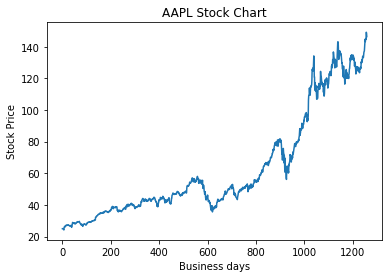

In [4]:
plt.plot(aapl_hist.loc[:,'Close'])
plt.ylabel('Stock Price')
plt.title('AAPL Stock Chart')
plt.xlabel('Business days')

plt.show()

## Moving Average

In [5]:
def simple_moving_average(hold_hist):
    periods = {5: [], 20: [], 50: []}
    for period in periods:
        for i in range(len(hold_hist)):
            if i < period:
                periods[period].append(np.nan)
            else:
                last_prices = []
                for j in range(period):
                    last_prices.append(hold_hist.at[i-j,'Close'])
                periods[period].append(stats.mean(last_prices))
    return periods

In [6]:
periods = simple_moving_average(aapl_hist)

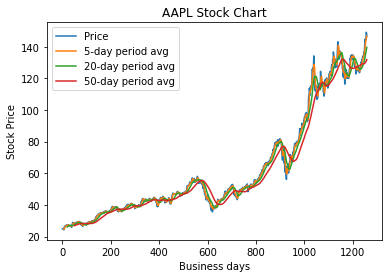

In [27]:
plt.plot(aapl_hist.loc[:,'Close'], label='Price')
plt.ylabel('Stock Price')
plt.title('AAPL Stock Chart')
plt.xlabel('Business days')
plt.plot(periods[5][:],label='5-day period avg')
plt.plot(periods[20][:],label='20-day period avg')
plt.plot(periods[50][:],label='50-day period avg')

plt.legend()

Buying and Selling Strategy:
- Buy when 5-day period price cross from below to above the 20-day price when both are larger than 50-day price.
- Sell when 5-day period price cross from above to below 20-day price when both are smaller than 50-day price.

In [60]:
'''3 Moving-Average Buy Sell Strategy'''

def three_ma(hold_hist):
    hold_result = []
    is_holding = False
    periods = simple_moving_average(hold_hist)

    for i in range(51, len(hold_hist)):     
        # buy when 5-period MA cross from below to above 20-period MA while both are greater than 50-period MA
        if periods[5][i] > periods[20][i] and periods[5][i] > periods[50][i] and periods[20][i] > periods[50][i] and is_holding == False:
            #periods[5][i-2] < periods[20][i-2]
            hold_result.append(i)
            is_holding = True
            print(f"Buy on day {hold_hist.at[i,'Date']}")
        # sell when 5-period MA cross from above to below 20-period MA while both are smaller than 50-period MA
        elif periods[5][i] < periods[20][i] and periods[5][i] < periods[50][i] and periods[20][i] < periods[50][i] and is_holding == True:
            #periods[5][i-2] > periods[20][i-2] and
            is_holding = False
            hold_result.append(0)
            print(f"Sell on day {hold_hist.at[i,'Date']}")
        elif is_holding:
            hold_result.append(i)   
        else:
            hold_result.append(0)

            
    return hold_hist.iloc[hold_result,:].reset_index()

In [61]:
new_df = three_ma(aapl_hist)

Buy on day 2016-09-28
Sell on day 2016-11-15
Buy on day 2016-12-22
Sell on day 2017-06-27
Buy on day 2017-08-02
Sell on day 2017-10-02
Buy on day 2017-11-01
Sell on day 2018-02-06
Buy on day 2018-03-08
Sell on day 2018-04-24
Buy on day 2018-05-10
Sell on day 2018-10-29
Buy on day 2019-02-12
Sell on day 2019-05-24
Buy on day 2019-07-01
Sell on day 2020-03-05
Buy on day 2020-04-30
Sell on day 2020-10-23
Buy on day 2020-11-10
Sell on day 2021-02-26
Buy on day 2021-04-19
Sell on day 2021-05-26
Buy on day 2021-06-28


Text(0.5, 1.0, 'Applied Strategy - AAPL Stock Chart')

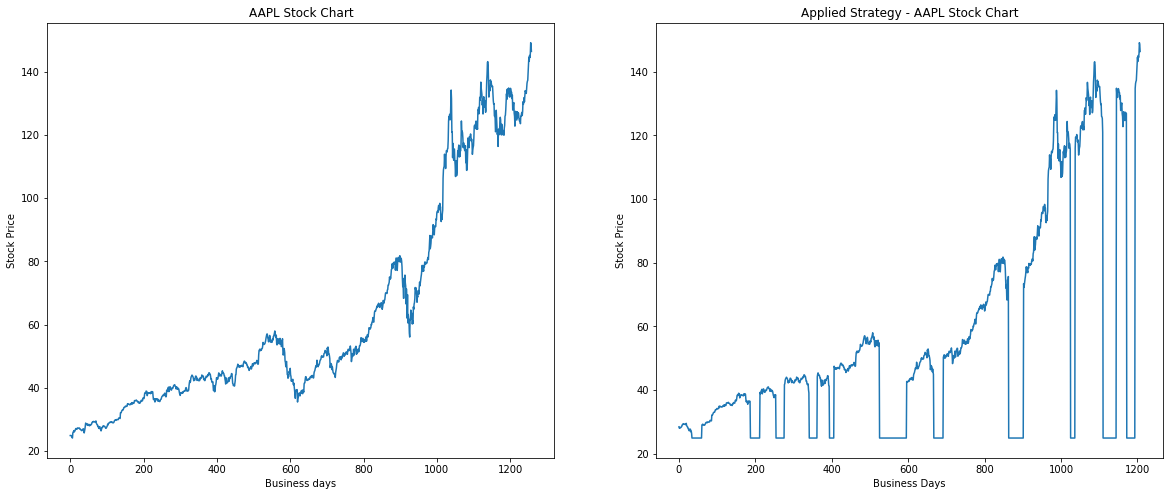

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

ax1.plot(aapl_hist.loc[:,'Close'])
ax1.set_ylabel('Stock Price')
ax1.set_title('AAPL Stock Chart')
ax1.set_xlabel('Business days')

ax2.plot(new_df['Close'])
ax2.set_ylabel('Stock Price')
ax2.set_xlabel('Business Days')
ax2.set_title('Applied Strategy - AAPL Stock Chart')

In [55]:
mdd(new)

MDD: -26.668683529325342% 	 resulting from 58.017502 to 42.544998
MDD Duration: 160 business days 	 from 2018-10-03 to 2019-02-13


(-0.26668683529325343, 160)